## Diabetes Prediction using Single Layer Perceptron 
##### Dataset : Pima Indian Diabetes 

In [1]:
!pip install torch

#### Import Libraries

In [327]:
# load all the necesary libraries

# Pandas
import pandas as pd 

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# NumPy
import numpy as np

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



# Pytorch
import torch
import torch.nn as nn

In [328]:
%matplotlib inline

### Data Pre-Processing

In [329]:
# read the dataset into dataframe
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here, we can see that the dataset has 8 variables and 1 output column (Outcome). We are going to build a model to predict whether a person has diabetes or not through the given 8 variables (input).

In [330]:
# check for any missing values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can notice that there is no missing values.

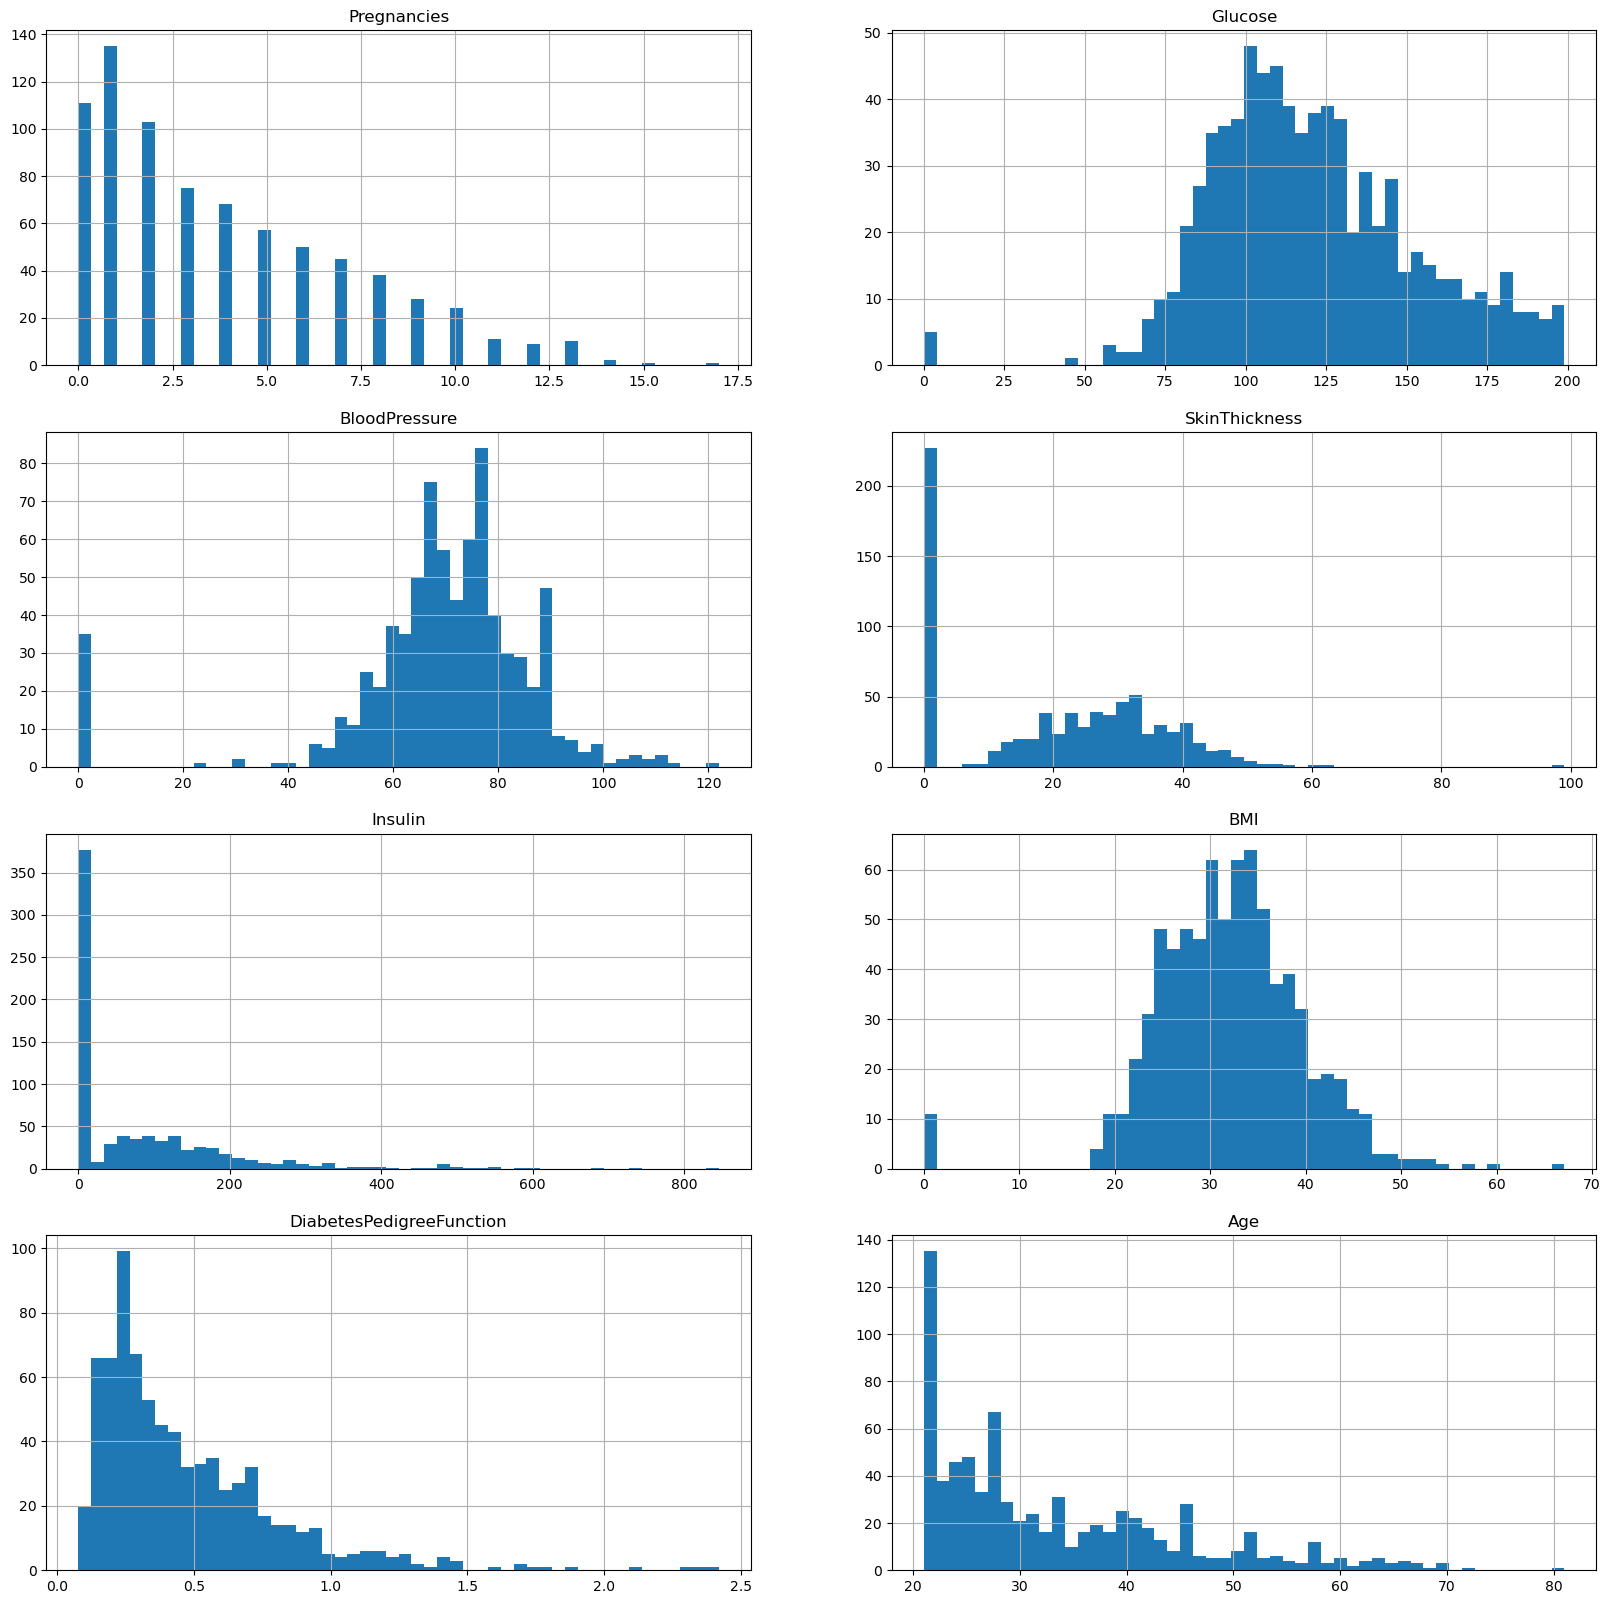

In [331]:
# visualise histogram for each feature or variable
figure, axis = plt.subplots(4, 2, figsize = (20, 20))

for i in range(4):
    for j in range(2):
        col = i * 2 + j
        axis[i, j].hist(df.iloc[:, col], bins = 50)
        axis[i, j].set_title(df.columns[col])
        axis[i, j].grid(True)

plt.show()

We can notice some outlier values in the data but we will not be removing the data to prevent data loss as they might be important instances.

In [332]:
# visualising data distribution using seaborn
# see how the data is distributed between people with diabetes and people with no diabetes
# using pairplot of seaborn
df2 = df.copy()   

df2['Outcome'] = np.where(df2['Outcome'] == 1, "Have diabetes", "Have no diabetes")
# replacing int values with string values in output column ("Outcome") 

df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Have diabetes
1,1,85,66,29,0,26.6,0.351,31,Have no diabetes
2,8,183,64,0,0,23.3,0.672,32,Have diabetes
3,1,89,66,23,94,28.1,0.167,21,Have no diabetes
4,0,137,40,35,168,43.1,2.288,33,Have diabetes


C:\Users\Brothers gadget\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


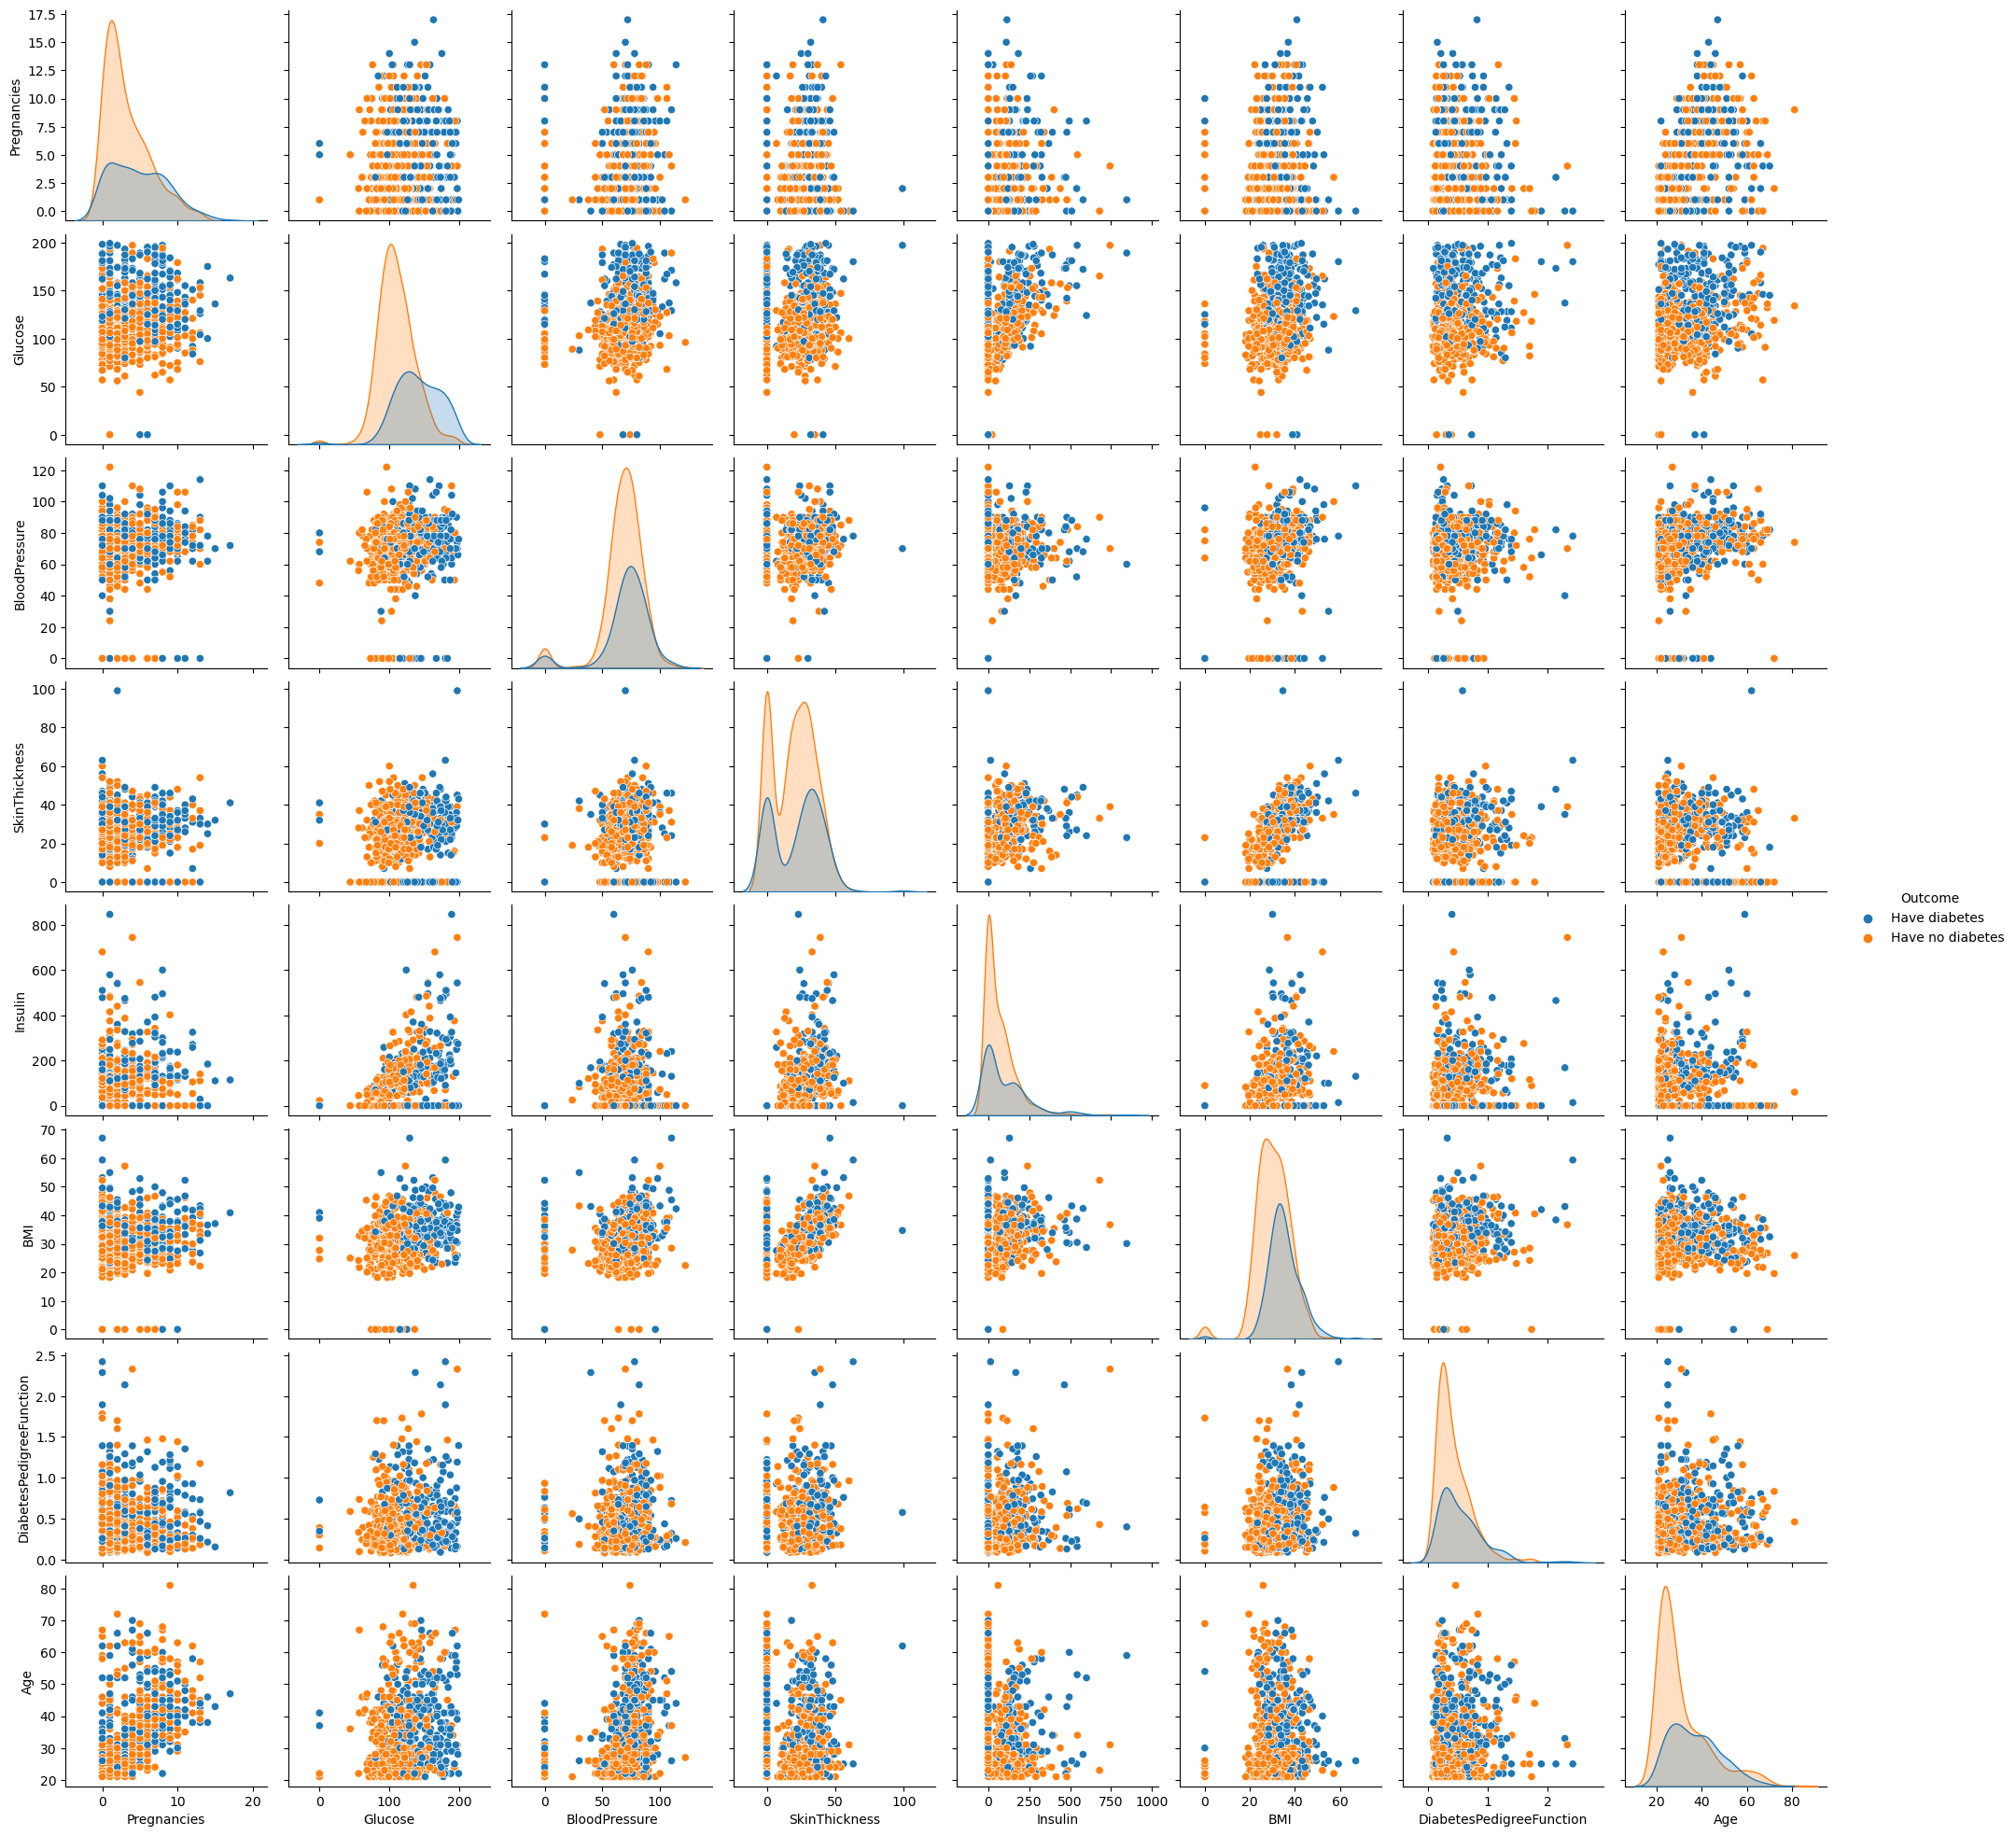

In [333]:
sns.pairplot(df2, hue = "Outcome")

Here, we can see the distibution of both the blue colored dots presenting the people having diabetes and the orange colored dots presenting the people having no diabetes.

In [334]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Split Train and Test Data

In [335]:
# define and store X(features) and y(output) values into numpy array
X = df.drop('Outcome', axis = 1).values     # features
y = df['Outcome'].values             # labels or outputs

In [336]:
count_diabetes, count_no_diabetes = 0, 0

for item in y:
    if item == 1:
        count_diabetes += 1
    else:
        count_no_diabetes += 1

print("Total instances:", count_diabetes+count_no_diabetes)
print("People with diabetes:", count_diabetes)
print("People with no diabetes:", count_no_diabetes)

Total instances: 768
People with diabetes: 268
People with no diabetes: 500


In [337]:
df.shape

(768, 9)

In [338]:
# from sklearn.model_selection import train_test_split

# using sklearn model's train_test_split to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Data Modeling

In [339]:
# using Pytorch
# import torch
# import torch.nn as nn

In [340]:
# creating tensors (for both input features and output values)  

# converting X values to float tensors 
X_train = torch.FloatTensor(X_train)  # float tensors - the X values are converted as floating point
X_test = torch.FloatTensor(X_test)

# converting y values to long tensors 
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [341]:
# creating the model with Pytorch


# --- Single Layer Perceptron (SLP) Model ---

"""
the model predicts the class (binary classification) 
based on a linear combination of inputs
with no hidden layer
using a step function (sigmoid activation function)
"""

class SLP_Model(nn.Module):
    
    def __init__(self, input_features = 8):    # no hidden layers and output layer 
        super().__init__()
        
        # connecting the input to output | single layer
        self.fully_connected = nn.Linear(input_features, 1)  
        
        # single value output for binary classification
        
        
    # forward propogation
    def forward(self, x):
        x = torch.sigmoid(self.fully_connected(x))   # sigmoid activation function
        return x

We have created the single layer perceptron model for our prediction with the application of linear transformation.

In [342]:
# instantiating the SLP_Model

# set a seed
# to apply the initial weights
torch.manual_seed(20)

model = SLP_Model()

In [343]:
# check the model parameters
model.parameters

<bound method Module.parameters of SLP_Model(
  (fully_connected): Linear(in_features=8, out_features=1, bias=True)
)>

In [344]:
# backward propogation
"""
- define the loss_function
- define the optimizer
"""
# defining the loss function 
loss_function = nn.BCELoss()  # BCELoss for binary classification 

# defining the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)   # learning rate 0.001

In [345]:
# training the model in loop
# trigering the forward propagation to start it
epochs = 1000

final_losses = []  # store all loss values


for i in range(epochs):
    i += 1
    
    # getting prediction values 
    # using forward() function we defined
    y_pred = model.forward(X_train).squeeze()  # match the shape of y_train with squeeze 
    
    
    # calculating the loss
    # using loss_function() function
    loss = loss_function(y_pred, y_train.float())  # y_train in float for BCELoss
    final_losses.append(loss.item())  # add up the losses
    
    
    # seeing the loss at each 10 epochs
    if i % 10 == 1:
        print(f"epoch: {i} and the loss: {loss.item()}")  # dict
        
        
        
    # clearing the gradients
    optimizer.zero_grad() 
    
    
    # measuring gradients
    # using backward() function
    loss.backward()
    
    
    # updating the weight (w) values
    optimizer.step()

epoch: 1 and the loss: 14.575379371643066
epoch: 11 and the loss: 13.170702934265137
epoch: 21 and the loss: 11.81177806854248
epoch: 31 and the loss: 10.449475288391113
epoch: 41 and the loss: 9.232552528381348
epoch: 51 and the loss: 8.158976554870605
epoch: 61 and the loss: 7.340814590454102
epoch: 71 and the loss: 6.609194278717041
epoch: 81 and the loss: 6.021859645843506
epoch: 91 and the loss: 5.4914374351501465
epoch: 101 and the loss: 4.9936652183532715
epoch: 111 and the loss: 4.539066314697266
epoch: 121 and the loss: 4.005579471588135
epoch: 131 and the loss: 3.6819252967834473
epoch: 141 and the loss: 3.3046274185180664
epoch: 151 and the loss: 3.1434855461120605
epoch: 161 and the loss: 2.8880064487457275
epoch: 171 and the loss: 2.778529167175293
epoch: 181 and the loss: 2.670429229736328
epoch: 191 and the loss: 2.563349962234497
epoch: 201 and the loss: 2.458064317703247
epoch: 211 and the loss: 2.3552801609039307
epoch: 221 and the loss: 2.2548344135284424
epoch: 231 

Text(0.5, 0, 'Epoch')

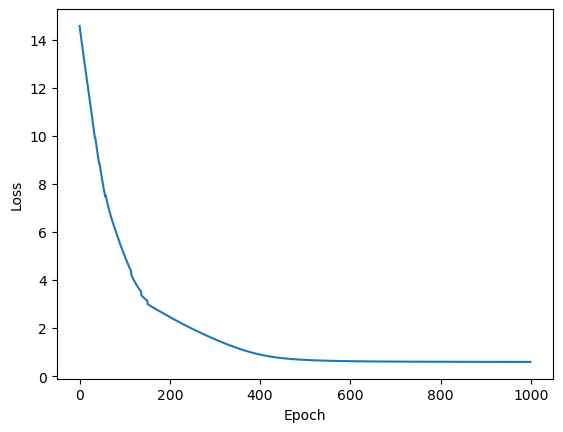

In [346]:
# plotting the loss function
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Perceptron Model Prediction

In [347]:
# making predictions using the trained perceptron (SLP) model
# prediction in X_test data
predictions = []


# preventing gradient calculation for prediction
with torch.no_grad(): 
    
    for i, data in enumerate(X_test):
        # print(model(data))
        y_pred = model(data).item()  # predicted output (probability) from the perceptron
        
        
        # converting probability to only 0 or 1 (binary)
        predicted_class = 1 if y_pred >= 0.5 else 0
        predictions.append(predicted_class)

        print(predicted_class)

1
0
0
1
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
1
1
1
0
0
1
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Evaluating Predictions

In [348]:
# using confusion matrix and accuracy score
# from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[91, 16],
       [25, 22]], dtype=int64)

Text(70.72222222222221, 0.5, 'Predicted Values')

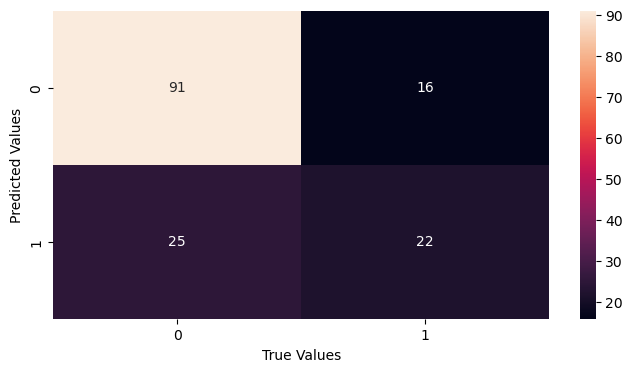

In [349]:
# visualising the confusion matrix
plt.figure(figsize = (8, 4))
sns.heatmap(cm, annot = True, fmt = "d")

plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [350]:
# accuracy score

# from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.38%


### Save SLP Model

In [351]:
# saving the model
torch.save(model, 'diabetes_prediction_using_SLP.pt')

In [352]:
# saving and loading the model
model = torch.load('diabetes_prediction_using_SLP.pt')

C:\Users\Brothers gadget\AppData\Local\Temp\ipykernel_9448\2781353638.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('diabetes_prediction_using_SLP.p

In [353]:
model.eval()  # set evaluation mode

SLP_Model(
  (fully_connected): Linear(in_features=8, out_features=1, bias=True)
)

### Prediction of Given Data Point 

In [354]:
# predicting using new data point

# converting the first row of the dataframe to a list (of input features)
list(df.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [355]:
random_instance = [6.0, 192.0, 72.0, 23.0, 0.0, 34.6, 0.627, 50.0]

# converting the new data point to tensor
new_data = torch.tensor(random_instance, dtype = torch.float32)

In [356]:
# predicting new data using Pytorch
with torch.no_grad():
    
    prediction = model(new_data).item()  # storing predicted probability
    
    
    # setting condition to classify 0 or 1 (binary class)
    predicted_class = 1 if prediction >= 0.5 else 0
    
    
    
    print("Results: ")
    print("________")
    
    print(f"Predicted Probability: {prediction:.4f}")
    print(f"Predicted Class: {predicted_class}")
    
    print("Prediction: The person has diabetes.") if predicted_class == 1 else print("Prediction: The person does not have diabetes.")

Results: 
________
Predicted Probability: 0.6517
Predicted Class: 1
Prediction: The person has diabetes.
